# Business Case:The target is to create a ML model which predicts players finishing placement based on their final stats.

In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score,classification_report,accuracy_score

In [2]:
# loading of data
data=pd.read_csv('pubg.csv')


# Basic Checks

In [3]:
# prints first 5 rows of the data
data.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [4]:
# prints last5 rows of the data
data.tail()

Id         groupId         matchId  assists  boosts  \
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
4446961         0.00      0              0      0         74  ...        0   
4446962        44.15      0              0      0         69  ...        0   
4446963        59.06      0              0      0         66  ...        0   
4446964       180.40      1              1      2         11  ...        2   
4446965       268.00      0              0      1         18  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
4446961        1292.0          0         0.000          0               0   
4446962           0.0          0         0.000          0               0   
4446963           0.0          0         2.184          0               0   
4446964           0.0          0         0.000          0               0   
4446965        1369.0          0         0.000          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
4446961        1019.0                3       1507        0.1786  
4446962          81.7                6          0        0.2935  
4446963         788.7                4          0        0.4815  
4446964        2748.0                8          0        0.8000  
4446965        1244.0                5          0        0.5464  

[5 rows x 29 columns]

In [5]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   ...  1.646590e-01  6.061157e+02  3.496091e-03  4.509322e+00   
std    ...  4.721671e-01  1.498344e+03  7.337297e-02  3.050220e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00   
max    ...  3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  4.446966e+06     4.446966e+06  4.446966e+06     4.446966e+06   
mean   2.386841e-02     7.918208e-03  1.154218e+03     3.660488e+00   
std    1.673935e-01     9.261157e-02  1.183497e+03     2.456544e+00   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00     0.000000e+00  1.551000e+02     2.000000e+00   
50%    0.000000e+00     0.000000e+00  6.856000e+02     3.000000e+00   
75%    0.000000e+00     0.000000e+00  1.976000e+03     5.000000e+00   
max    1.200000e+01     5.000000e+00  2.578000e+04     2.360000e+02   

          winPoints  winPlacePerc  
count  4.446966e+06  4.446965e+06  
mean   6.064601e+02  4.728216e-01  
std    7.397004e+02  3.074050e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.000000e-01  
50%    0.000000e+00  4.583000e-01  
75%    1.495000e+03  7.407000e-01  
max    2.013000e+03  1.000000e+00  

[8 rows x 25 columns]

In [6]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
# it shows the number columns and rows that data consists
data.shape

(4446966, 29)

# Domain Analysis

In [8]:
# displays all the columns
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

### GroupId

 Players team ID

### MatchId

Match ID

### Assists

Number of assisted kills. The killed is actually scored for the another teammate.

### boosts

Number of boost items used by a player. These are for example: energydring, painkillers, adrenaline syringe.

### Damagedealt

Damage dealt to the enemy

### DBNOS

Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.

### headshotKills

Number of enemies killed with a headshot

### heals

Number of healing items used by a player. These are for example: bandages, first-aid kits

### killplace

 Ranking in a match based on kills.

### killpoints

 Points in a match based on kills.

### kills

Number of enemy players killed.

### killstreaks

 Max number of enemy players killed in a short amount of time.

### longestKills

Longest distance between player and killed enemy.

### Matchduration

Duration of a mactch in seconds.

### MatchType

Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.

### Maxplace

The worst placement we have in the match.

### Numgroups

Number of groups (teams) in the match.

### rankPoints

PUBG has six ranking tiers starting with Bronze and ending with Master. Each tier has five divisions 
within them, with 5 being the lowest and 1 the highest. This means there are 30 ranks in total if you 
exclude unranked from the list.

### revives

Number of times this player revived teammates.

### rideDistance

 Total distance traveled in vehicles measured in meters.

### roadkills

Number of kills from a car, bike, boat, etc.

### swimDistance

Total distance traveled by swimming (in meters).

### Teamkills

 Number teammate kills (due to friendly fire).

### vehicleDestroys

 Number of vehicles destroyed.

### walkDistance

Total distance traveled on foot measured (in meters).

### weaponsAcquired

Number of weapons picked up.

### winpoints

Ranking in a match based on won matches.


### winPlacePerc

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) 
which get ranked at the end of the game (winPlacePerc) based on how many other teams are still 
alive when they are eliminated.
Target Variable

# Exploratory Data Analysis

### Univariate Analysis

In [4]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='assists', ylabel='Density'>

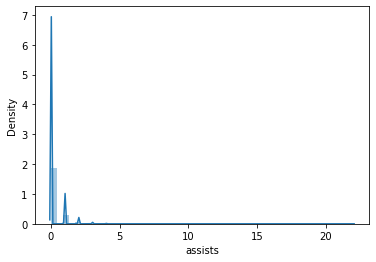

In [8]:
## ANalsyzing assists
sns.distplot(data.assists)
## Not Normal distribution

<AxesSubplot:xlabel='boosts', ylabel='Density'>

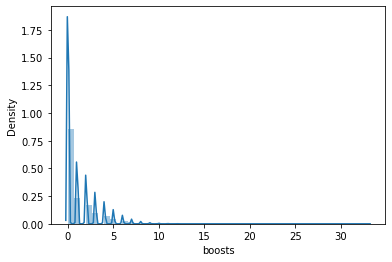

In [9]:
## ANalsyzing boosts
sns.distplot(data.boosts)
## Not Normal distribution

<AxesSubplot:xlabel='damageDealt', ylabel='Density'>

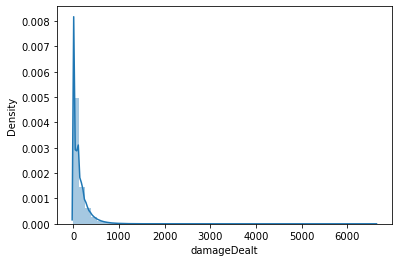

In [10]:
## ANalsyzing damageDealt
sns.distplot(data.damageDealt)
## Normal distribution

<AxesSubplot:xlabel='DBNOs', ylabel='Density'>

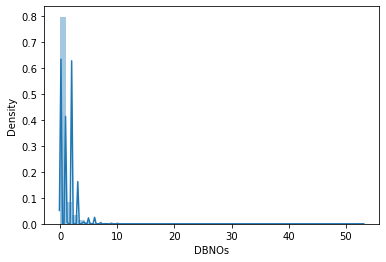

In [11]:
## ANalsyzing DBNOs
sns.distplot(data.DBNOs)
## Not Normal distribution

<AxesSubplot:xlabel='headshotKills', ylabel='Density'>

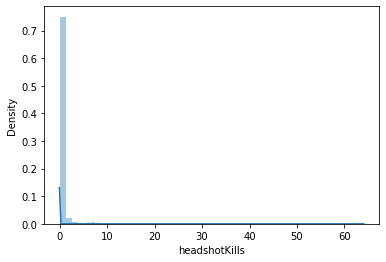

In [12]:
## ANalsyzing headshotKills
sns.distplot(data.headshotKills)
## Not Normal distribution

<AxesSubplot:xlabel='heals', ylabel='Density'>

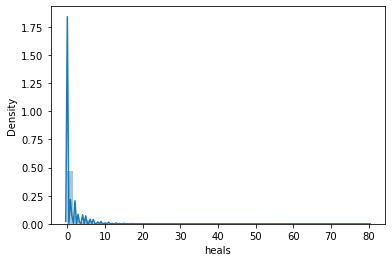

In [13]:
## ANalsyzing heals
sns.distplot(data.heals)
## Not Normal distribution

<AxesSubplot:xlabel='killPlace', ylabel='Density'>

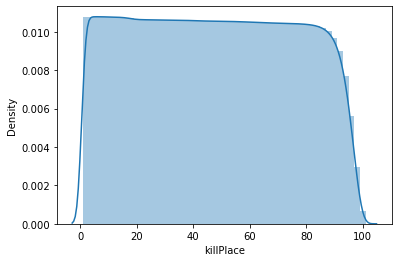

In [14]:
## ANalsyzing killPlace
sns.distplot(data.killPlace)
## Not Normal distribution

<AxesSubplot:xlabel='killPoints', ylabel='Density'>

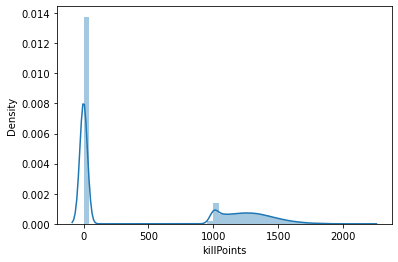

In [15]:
## ANalsyzing killPoints
sns.distplot(data.killPoints)
## Not Normal distribution

<AxesSubplot:xlabel='kills', ylabel='Density'>

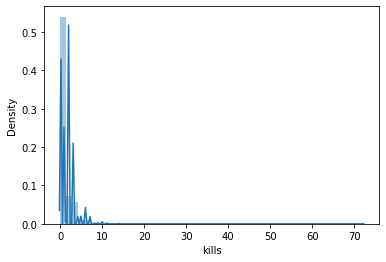

In [16]:
## ANalsyzing kills
sns.distplot(data.kills)
## Not Normal distribution

<AxesSubplot:xlabel='killStreaks', ylabel='Density'>

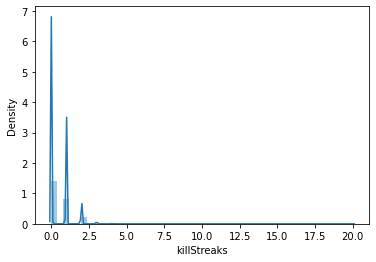

In [17]:
## ANalsyzing killStreaks
sns.distplot(data.killStreaks)
## Not Normal distribution

<AxesSubplot:xlabel='longestKill', ylabel='Density'>

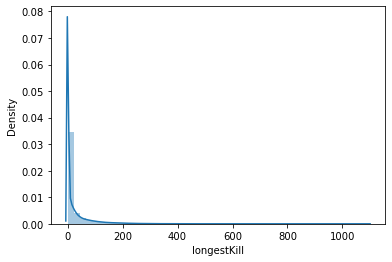

In [18]:
## ANalsyzing longestKill
sns.distplot(data.longestKill)
## Normal distribution

<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

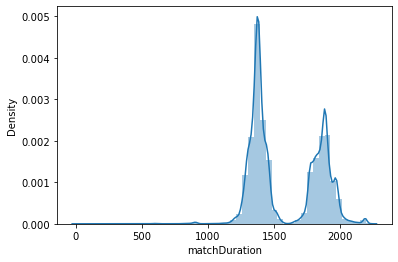

In [19]:
## ANalsyzing matchDuration
sns.distplot(data.matchDuration)
## Not Normal distribution

<AxesSubplot:xlabel='matchType', ylabel='count'>

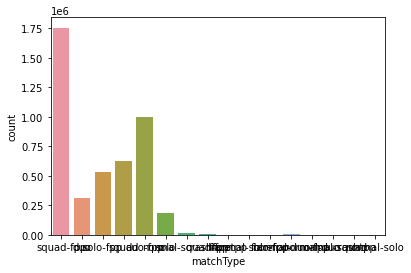

In [21]:
## ANalsyzing matchType
sns.countplot(data.matchType)
## Not Normal distribution

<AxesSubplot:xlabel='maxPlace', ylabel='Density'>

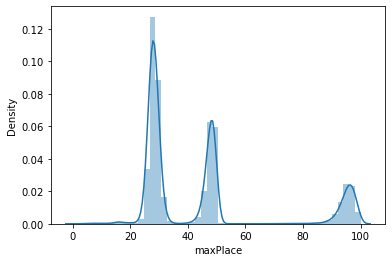

In [22]:
## ANalsyzing maxPlace
sns.distplot(data.maxPlace)
## Not Normal distribution

<AxesSubplot:xlabel='numGroups', ylabel='Density'>

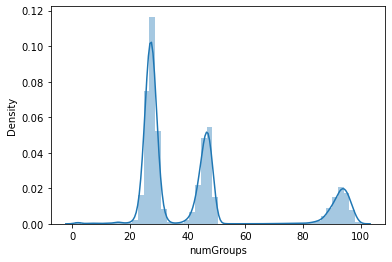

In [23]:
## ANalsyzing numGroups
sns.distplot(data.numGroups)
## Not Normal distribution

<AxesSubplot:xlabel='rankPoints', ylabel='Density'>

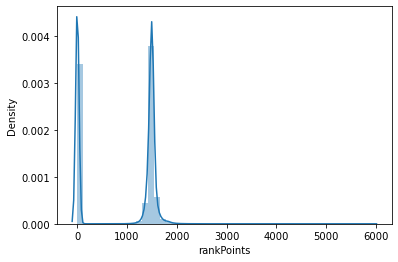

In [24]:
## ANalsyzing rankPoints
sns.distplot(data.rankPoints)
## Not Normal distribution

<AxesSubplot:xlabel='revives', ylabel='Density'>

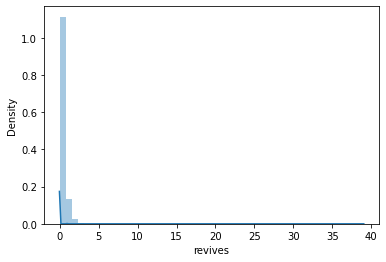

In [25]:
## ANalsyzing revives
sns.distplot(data.revives)
## Not Normal distribution

<AxesSubplot:xlabel='rideDistance', ylabel='Density'>

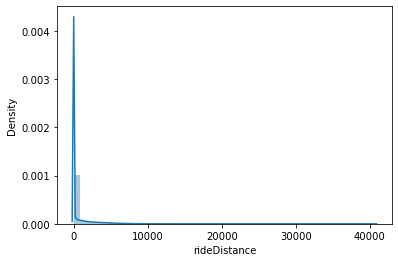

In [27]:
## ANalsyzing rideDistance
sns.distplot(data.rideDistance)
## Normal distribution

<AxesSubplot:xlabel='roadKills', ylabel='Density'>

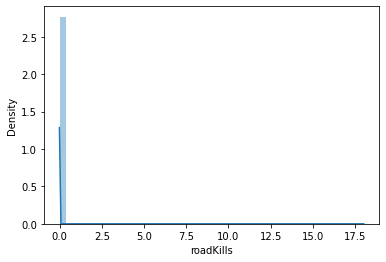

In [26]:
## ANalsyzing roadKills
sns.distplot(data.roadKills)
## Not Normal distribution

<AxesSubplot:xlabel='swimDistance', ylabel='Density'>

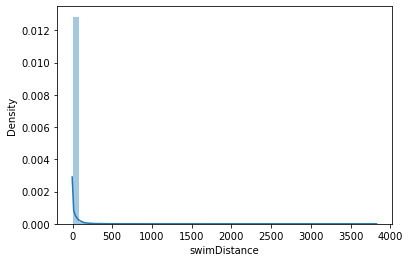

In [28]:
## ANalsyzing swimDistance
sns.distplot(data.swimDistance)
## Not Normal distribution

<AxesSubplot:xlabel='teamKills', ylabel='Density'>

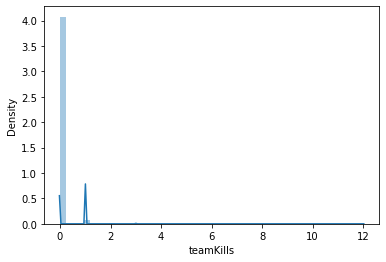

In [29]:
## ANalsyzing teamKills
sns.distplot(data.teamKills)
## Not Normal distribution

<AxesSubplot:xlabel='vehicleDestroys', ylabel='Density'>

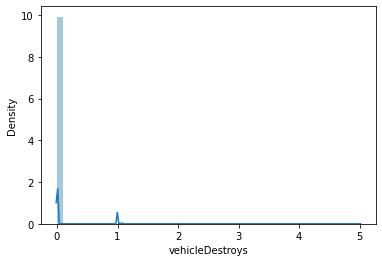

In [30]:
## ANalsyzing vehicleDestroys
sns.distplot(data.vehicleDestroys)
## Not Normal distribution

<AxesSubplot:xlabel='walkDistance', ylabel='Density'>

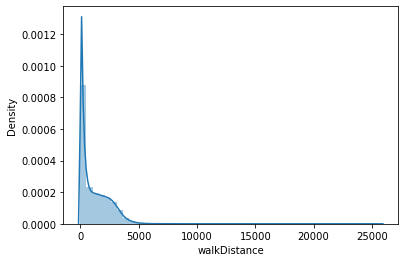

In [31]:
## ANalsyzing walkDistance
sns.distplot(data.walkDistance)
## Normal distribution

<AxesSubplot:xlabel='weaponsAcquired', ylabel='Density'>

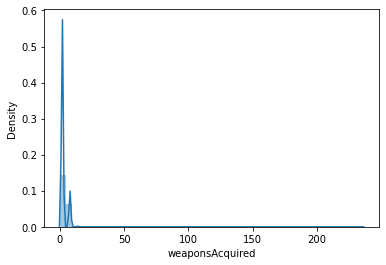

In [32]:
## ANalsyzing weaponsAcquired
sns.distplot(data.weaponsAcquired)
## Not Normal distribution

<AxesSubplot:xlabel='winPoints', ylabel='Density'>

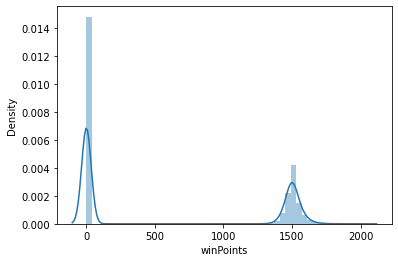

In [33]:
## ANalsyzing winPoints
sns.distplot(data.winPoints)
## Not Normal distribution

<AxesSubplot:xlabel='winPlacePerc', ylabel='Density'>

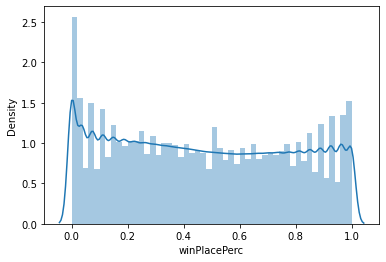

In [34]:
## ANalsyzing winPlacePerc
sns.distplot(data.winPlacePerc)
## Not Normal distribution

### Insights from Univariate Analysis

In [ ]:
1. There is no duplicates in the dataframe.

2. There are 29 features.

3. There are 2 CATEGORICAL,24 NUMERICAL,3 TEXT.

4. assists - Number of assisted kills. The killed is actually scored for the another teammate.
             maximum assists done is 22, with the average of 0.2 and highest of 82.5% of zero assists

5. boosts - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
            maximum boosts used is 33 times, with average of 1.1 and with highest of 56.7% of zero boosts

6. damageDealt - Damage dealt to the enemy
      maximum damage dealt to the enemy is 6,616 , with the average of 131 and zero being the most frequent value with 27.8%

7. DBNOs - Down But No Out - when you lose all your HP but you are not killed yet. All you can do is only to crawl.
           Largest value being 53, with the average of 0.7 and smallest value being zero with 62.4%

8. HeadShotKills- The number of players died with headshot are mostly less than 8.

9. Heals- The number of healing items used by players(which is around 15) are almost 98%.

10. KillPlace- Based on number of kills the ranking in a match is 11% for almost all the players except the last ten.

11. KillPoints- Based on kill points of the players in a match, points is the highest around 100 and 200 then
                there is no points upto 1000. Again the points from nearly 1000 to 2000 has fluctuations.

12. Kills- Number of enemies in the game killed are mostly from 1 to around 8.

13. KillStreaks- Around 90% of the enemy players are killed in 1 to 2 secs and the minimun players are killed 
                 in between 2 to 4 secs.

14. LongestKill- The maximum distance between the player and enemy is 100 to 200 meters approximately and
                 the minimum distance is 150 to 200 meters.

15. MatchDuration- Almost 42% of the players finish the match at 1400 and 1500 seconds and least number of players
                   finishing duration is 1700 and 2200 seconds.    

16. MatchType- Most of the matches played are Squad and the next one is duo and least played is solo. 

17. maxPlace - The worst place to be in the match.
               maximum maxplace used is 100, with the average of 44.5 and with highest of 14.1 of zero boosts

18. numGroups - Number of groups (teams) in the match.
                maximum numGroups used is 100, with the average of 43.0 and with highest of 12.1 of zero numGroups

19. rankPoints -PUBG has six ranking tiers starting with Bronze and ending with Master. Each tier has five
           divisions within them, with 5 being the lowest and 1 the highest. This means there are 30 ranks in total
           if you exclude unranked from the list.
           maximum rankPoints used is 5,910, with the average of 892 and with highest of 38.3 of zero rankPoints

20. revives - Number of times this player revived teammates.    
              maximum revives used is 39.0, with the average of 0.2 and with highest of 86.8 of zero revives

21. rideDistance - Total distance traveled in vehicles measured in meters.    
                maximum rideDistance used is 40,710, with the average of 606 and with highest of 74.4 of zero rideDistance

22. roadKills - Number of kills from a car, bike, boat, etc.
                maximum roadKills used is 18.0, with the average of 0.0 and with highest of 99.7 of zero roadKills

23. swimDistance - Total distance traveled by swimming (in meters).
                   maximum roadKills used is 3,823, with the average of 5 and with highest of 93.5 of zero roadKills
                   Maximum distance in swimming is travelled by the players occured in the interval 0 to 1000.
        
24. TeamKills- teammate kills (teamkills) was highest between 0 t0 2.5.

25. vehicleDestroyed- The graph shows that 100% of vehicles have been destroyed in the range 0 to 1.

26. walkDistannce- Maximum distance covered with walk by the players between 0.0k to 2.5k followed by walk distance
                 between 2.5k to 5.0k.

27. weaponsAcquired- Maximum weapons have been acquired by the players between 0 to 25.

28. winPoints- ranking is maximum for players between 0 to 250 and is average between 1400 to 1600 and 
               very less 1250 to 1300 and 1700 to 1750.

29. winPlacePerc- maximum players were alive after the end of the game between 0 to 1.

In [12]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}]) count:', data[i].nunique())

unique [Id]) count: 4446966
unique [groupId]) count: 2026745
unique [matchId]) count: 47965


In [13]:
pd.set_option('display.max_columns', None)

In [14]:
print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(data['kills'].mean(),data['kills'].quantile(0.99), data['kills'].max()))

On an average a person kills 0.9248 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 72.


In [15]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(data)))
data1 = data[data['damageDealt'] == 0].copy()
print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(data)))

A total of 127573 players (2.8688%) have won without a single kill!
A total of 4770 players (0.1073%) have won without dealing damage!


In [16]:
print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(data)))

99603 players (2.0329%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


In [17]:
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER rode for {}m.".format(data['rideDistance'].mean(), data['rideDistance'].quantile(0.99), data['rideDistance'].max()))

An average person drives for 606.1m, 99% of people have drived 6966.0m or less, while THE RIDER rode for 40710.0m.


In [18]:
print("{} players ({:.4f}%) drive for 0 meters. This means that they like walking more than riding.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(data)))

3309429 players (23.1022%) drive for 0 meters. This means that they like walking more than riding.


In [19]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the maximun used is {}.".format(data['heals'].mean(), data['heals'].quantile(0.99), data['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the maximun used is {}.".format(data['boosts'].mean(), data['boosts'].quantile(0.99), data['boosts'].max()))

In the game on an average a person uses 1.4 heal items, 99% of people use 12.0 or less, while the maximun used is 80.
In the game on an average a person uses 1.1 boost items, 99% of people use 7.0 or less, while the maximun used is 33.


## Add New Features

In [21]:
## A groupby operation involves some combination of splitting the object, applying a function, 
## and combining the results.
groups=data.groupby('groupId').sum()

In [22]:
## add_col is the newdataframe that contains the below mentioned 4 features from the original data
add_col=groups.loc[:,['kills','revives','weaponsAcquired','teamKills']]

In [23]:
# These are the new columns
## the columns from the original can be renamed at our convinience
add_col=add_col.rename(columns={'kills':'_groupKills','revives':'_groupRevives',
                                'weaponsAcquired':'_groupWeapons','teamKills':'_groupOwnKills'})

In [24]:
## the add_col is merged with groupid
data=data.merge(add_col,how='left',on=['groupId'])

In [25]:
## headshotrate can  be calculated by headshotkills over kills
## since headshotrate contains nan values,can be filled using fillna
data['_headshot_rate'] = data['headshotKills'] / data['kills']
data['_headshot_rate'] = data['_headshot_rate'].fillna(0)

In [26]:
## the sum of all distances i.e..,ridedistance,walkdistance and swimdistance will be totaldistance
data['_totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']

In [27]:
## playersjoined can be identified using matchid 
data['_playersJoined'] = data.groupby('matchId')['matchId'].transform('count')

In [28]:
## walkdistancepersec is watchdistance over matchduration
data['_walkDistancePerSec'] = data['walkDistance'] / data['matchDuration']

In [ ]:
## walkdistancepersec is totaldistance over matchduration
data['_totalDistancePerSec'] = data['_totalDistance'] / data['matchDuration']

In [30]:
## walkdistance over kill will get walkdistanceoverkills
data['_walkDistance_over_kills'] = data['walkDistance'] / data['kills']
data['_walkDistance_over_kills'] = data['_walkDistance_over_kills'].fillna(0)  

In [31]:
## totaldistance_over_kills is totaldistance over kills
data['_totalDistance_over_kills'] = data['_totalDistance'] / data['kills']
data['_totalDistance_over_kills'] = data['_totalDistance_over_kills'].fillna(0)    

In [32]:
## walkdistance over heals will get walkdistanceoverheals
data['_walkDistance_over_heals'] = data['walkDistance'] / data['heals']
data['_walkDistance_over_heals'] = data['_walkDistance_over_heals'].fillna(0)    

In [33]:
## totalDistance over heals will get totalDistance_over_heals
data['_totalDistance_over_heals'] = data['_totalDistance'] / data['heals']
data['_totalDistance_over_heals'] = data['_totalDistance_over_heals'].fillna(0)    

In [34]:
## the total distance over weapons acquired can be the distance over weapons
data['_distance_over_weapons'] = data['_totalDistance'] / data['weaponsAcquired']
data['_distance_over_weapons'] = data['_distance_over_weapons'].fillna(0)

In [35]:
## killspercentage in the data

## match can be identified by matchid
match = data.groupby('matchId')

## killspercentage is the kills occured in the match where pct is true
data['_killsPerc'] = match['kills'].rank(pct=True).values

## walkdistancepercentage is the walkdistance of a match where rankpct is true
data['_walkDistancePerc'] = match['walkDistance'].rank(pct=True).values

## damagedealtpercentage is the damagedealt in the match where rank pct is true 
data['_damageDealtPerc'] = match['damageDealt'].rank(pct=True).values

## walkpercentagekillspercentage is the walkdistancepercentage in the data over 
data['_walkPerc_killsPerc'] = data['_walkDistancePerc'] / data['_killsPerc']

##  Data Cleaning: Finding the fraudsters

In [ ]:
# kill more than 40 people by acquiring more than 50 weapons and maintaining a total distance of less than 100m
data[(data['kills'] >= 40) & (data['weaponsAcquired'] > 50) & (data['_totalDistance'] < 100.0)]

In [ ]:
# kill more than 40 people without using any heals
data[(data['kills'] >= 40) & (data['heals'] == 0)]

In [ ]:
# Check players who kills without moving
data['_killsWithoutMoving'] = ((data['kills'] > 10) & (data['_totalDistance'] == 0))
display(data[data['_killsWithoutMoving'] == True].shape)
data[data['_killsWithoutMoving'] == True].head(10)

In [ ]:
# List of who made more than 10 kills and all the kills were done by headshot
display(data[(data['_headshot_rate'] >= 0.9) & (data['kills'] >=20)].shape)
data[(data['_headshot_rate'] >= 0.9) & (data['kills'] >= 20)].head(10)

In [ ]:
# Longest Kill over 1000m with more 0.5 headshot rate
display(data[(data['longestKill'] >= 1000) & (data['_headshot_rate'] >= 0.5)].shape)
data[(data['longestKill'] >= 1000) & (data['_headshot_rate'] >= 0.5)].head(10)

In [ ]:
## roadKill above 10
data[data['roadKills'] > 10]

In [ ]:
# Finding anomaly in travelling
data[['walkDistance', 'rideDistance', 'swimDistance']].describe().T

In [ ]:
## Detecting Anomalies in Walking
data[(data['walkDistance'] >= 13000) & (data['kills'] == 0)]

In [ ]:
# Detecting Anomalies in Riding
data[(data['rideDistance'] >= 30000) & (data['kills'] == 0)]

In [ ]:
# Anomalies detection in WeaponAcquired above 80
display(data[data['weaponsAcquired'] >= 80].shape)
data[data['weaponsAcquired'] >= 80].head(10)

In [ ]:
# total distance travelled is 0
data[(data['_totalDistance'] == 0)]

## Dropping 

In [48]:
# drop #kill more than 40 people by acquiring more than 50 weapons and maintaining a total distance of less than 100m
data.drop(data[(data['kills'] >= 40) & (data['weaponsAcquired'] > 50) & (data['walkDistance'] < 100.0)].index, inplace=True)

In [49]:
## drop kill more than 40 people without using any heals
data.drop(data[(data['kills'] >= 40) & (data['heals'] == 0)].index, inplace=True)

In [50]:
# drop killwithoutmoving
data.drop(data[data['_killsWithoutMoving'] == True].index, inplace=True)

In [51]:
## imputation of target variable which contained Nan value
## since it is normally distributed,mean is the best option
data['winPlacePerc']  = data['winPlacePerc'].fillna(data['winPlacePerc'].mean())

In [9]:
## dropping the unwanted columns
## inplace=true will make the changes in original data
data.drop(['Id','groupId','matchId'],axis=1,inplace=True)

# Bivariate Analysis

In [7]:
## since the target value in the data contains Nan value,data need to be imputed for further analysis
report1=sv.analyze([data,'data'],target_feat='winPlacePerc')
report1.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights from bivariate analysis

In [ ]:
1,2,3. Id, groupId, matchId have no relation with the Target Variable.

4. Assists: Initially the number of Assisted kils are below 60% and it rises to almost 100% and
            it drastically decreases to below 5%.

5. Boosts: Players using boost items has gradually increased to approximately 90%
           but in between it has fell to the lowest perc(i.e.5%).

6. DamageDealt: Damage caused to the enemy is more from the players which is almost 80%, it has fluctuations and 
                then it rises to 100%.

7. DBNOs(Down But No out): DBNOs are less likely to occur among the players. Initially it was 65% and then it drops to 40%.

8. HeadShotKills: Number of enemies killed with headShot has gradually increased from below 80% to 100%.

9. Heals: The number of healing items used by players is almost 95%, which is mostly between the range of 20 to 50.

10. KillPlace: Ranking in a match based on kills is dropped drastically to 0% from 11%, it has no relation with Target 
               variable.

11. killPoints: Based on killpoints points is done only 60% within the range of 0 & 2710.

12. kills: Number of enemy players killed in the game are initially 80% and has a slight decrease then again has a slight rise 
           upto almost 90%.

13. killStreaks: Maximum number of enemy players killed in a short amount of time in percentage has fluctuations and
                 has a downfall of 50% and then it has sudden rise to approximately 90%.

14. longestKills: Longest distance between player and killed enemy is mostly between 200 and 700 metres wihch is 80%.

15. MatchDuration: Duration of match is shortest between 600 and 800 seconds and it has drastic decrease to 1000 seconds which 
                   is longest duration that lasts upto 2000 seconds.

16. matchType: Players are more likely to play Squad-fpp(matchType) which is 40% when compared to Squad(14%) and duo-app(23%)
                   is more in demand among players than duo matchType which is 7% comparatively.

17. maxPlace: Worst placement we have in the match fells from 53% to below 5% and then it gradually increases then have   
              fluctuations till 100th range.

18. numGroups: The maximum number of groups in the match are 20 and 50 which is of 50%. 40% of groups are minimum which is 30
               & 70 respectively.

19. rankPoints: Players highest ranking tier 1st is very low among players that falls from 20% and again goes high for 2nd place.
                The most common ranking rate is between 2 and 4..And the highest ranking tier is 4.5 which is almost 60%.

20. Revived: The number of times player revived their temmates is 5 to 7 which shows 80%.

21. RideDistance: The distance of the ride initially goes high from 2 to 10 meters and the minimum players ride distance is
                  25 meters per hour..The maximum of the ride distance among players is 35 meters whihch shows almost 90%.

22. RoadKills: The number of kills by car, bike etc. has a slight increase from a range of 0.5 to 6.3 approximately which 
               has 60% of kills.Then with the fluctuations it goes on decreasing upto 5% an dends at the range of around 13.5.

23. SwimDistance: The minimum distance travelled by swimming is 1,800 meters and the distance of swimming is maximum at 2,000 
                  and 2,700 approximately which rose to 80% and 100% respectively.


24. TeamKills: Number of team mates killed due to friendly fire is very less which decreases from 55% to 43% and
               then it has a sudden decrease to 5% till the range of 8..But from the range of 10 to 11 
               the growth of team kills is high which is 100%.

25. VehicleDestroys: The maximum number of vehicles that are destroyed are 4 & 5 which has 85% and 100% respectively chances.

26. WalkDistance: Maximum distance travelled on foot is between 3 and 15 meters(i.e. 65% to 70%) and the least distance 
                  travelled is 17 meters which is below 30%.

27. WeaponsAcquired: The less common weapons picked up by the players is between 110 & 140..And the highly picked weapons 
                     is between 170 and 190 which shows 100%.

28. WinPoints: Ranking in a match based on win points between 250 and 1,250 is minimum..After 1,250 to 2,000 win points,
               ranking goes higher which is 60%.

29. WinPlacePerc: The Target Variable- At the end of the game, based on how many other teams are still alive 
                  when they are eliminated, Players get ranked 0.01 to 0.10 shows the highest margin of 14%..
                  And the players who got ranked 1 has 11% of the total.

CONCLUSION:
Overall, in the solo and duos modes, the probability of winning increases with the increase of DBNOs; 
but in the squads mode, the increase is more obvious when the DBNOs is small,but when the DBNOs is greater than 6, 
the increase will no longer be obvious. Very gentle.The number of rescues is more interesting. 
Usually, teams with a higher number of rescues will have a lower probability of winning.
That is, the probability of winning increases first and then decreases with the increase of the number of rescues.
This phenomenon is especially obvious for the squads mode.

In [1]:
## Since the data contains so many columns,we have divided the columns as data1...data6
## so that data can be analyzed quickly and easily

In [13]:
data1=data[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints' ]]

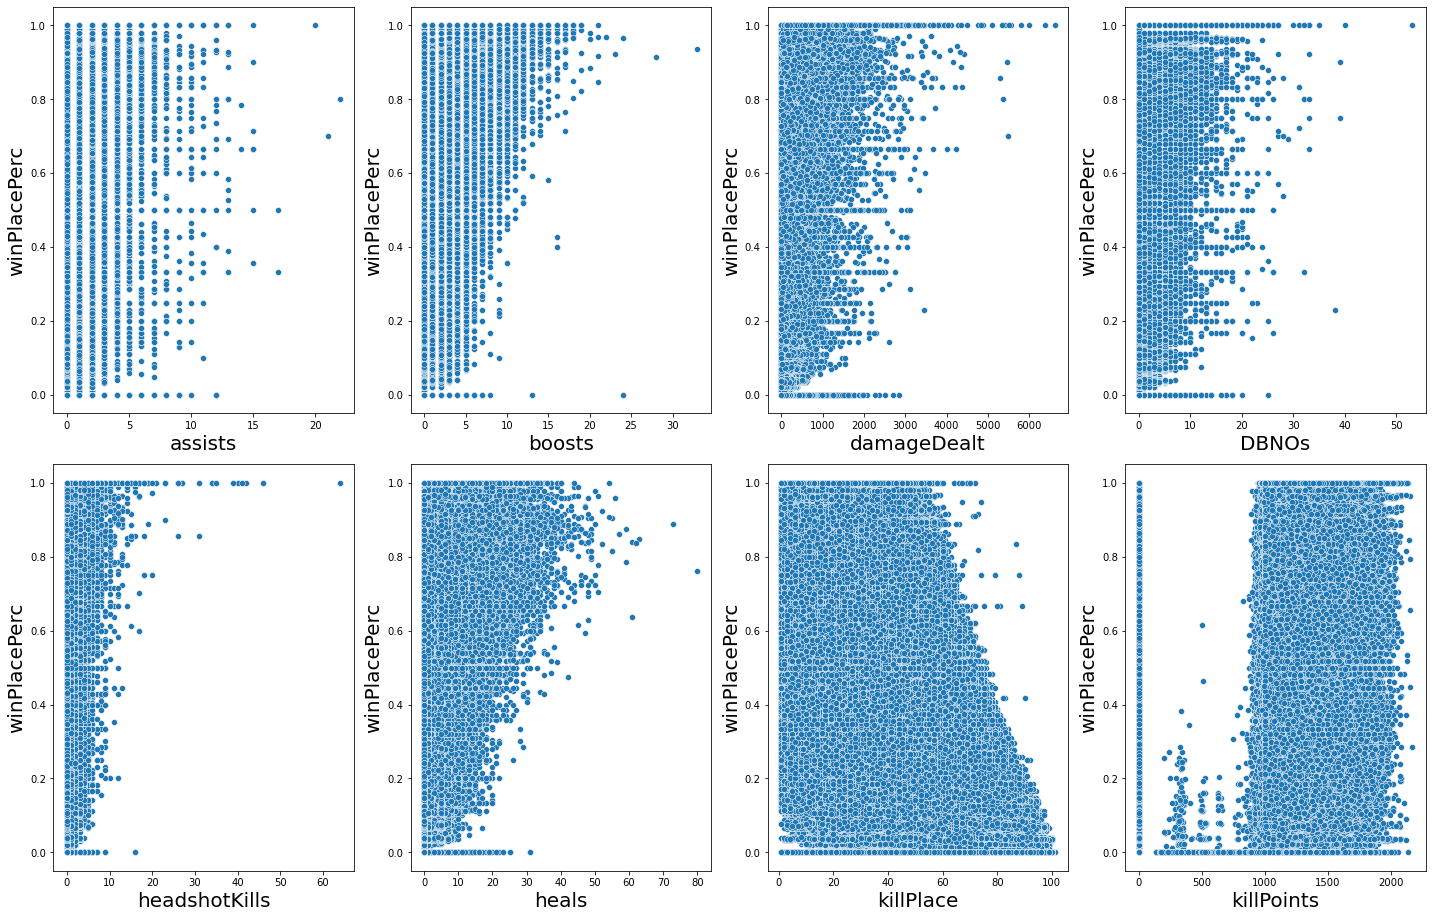

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column],y=data.winPlacePerc)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('winPlacePerc',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [8]:
data2=data[['kills','killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace','numGroups', 'rankPoints']]

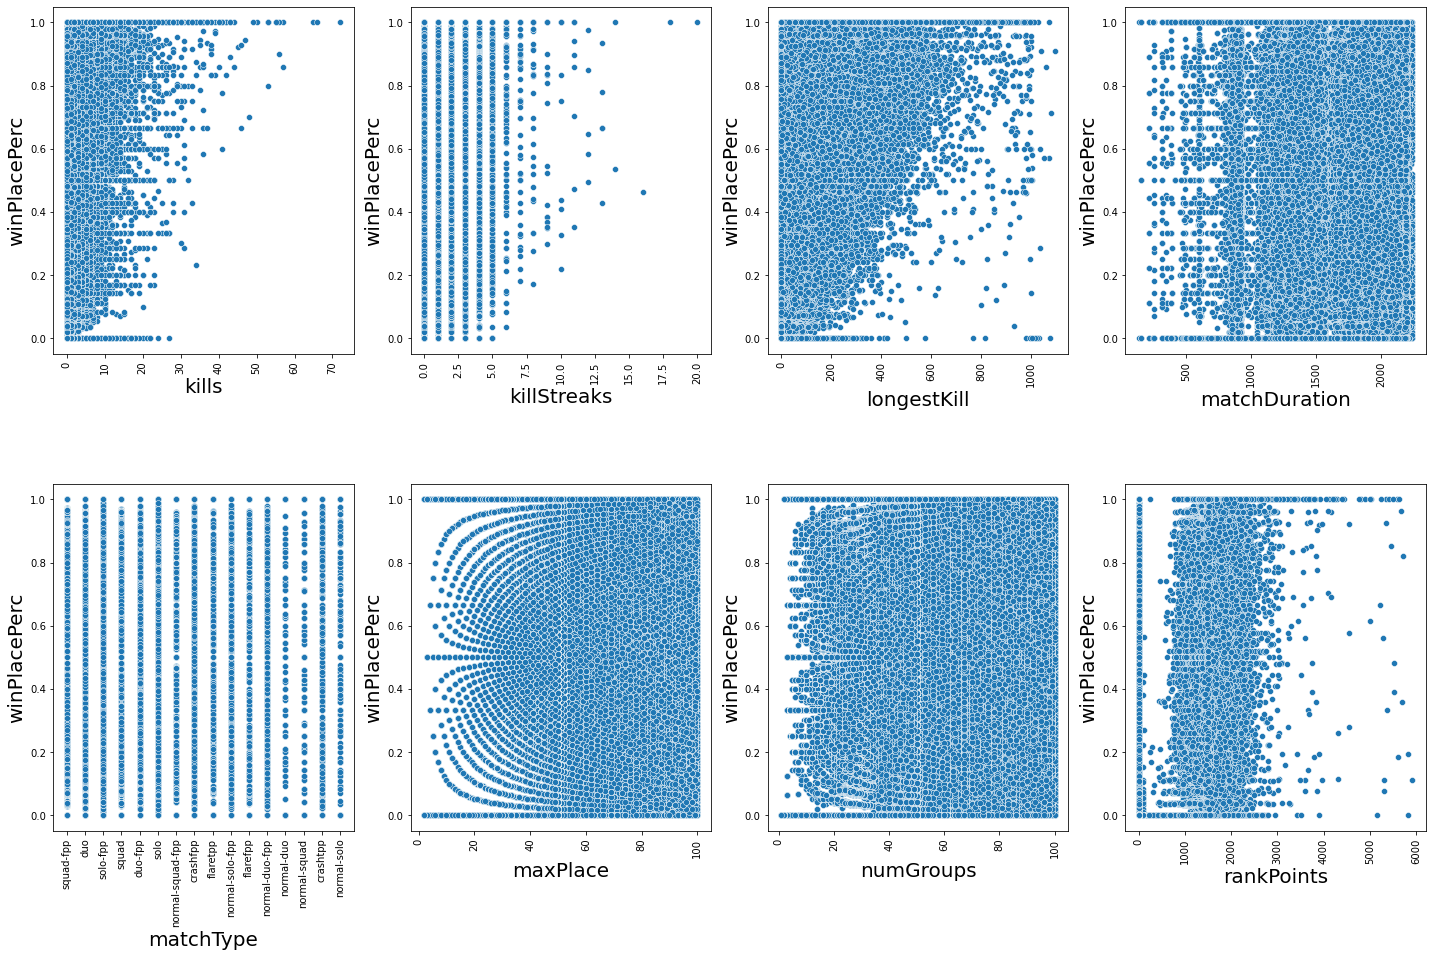

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data2[column],y=data.winPlacePerc)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90)
        plt.ylabel('winPlacePerc',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [24]:
data3=data[['revives', 'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 
            'walkDistance','weaponsAcquired']]

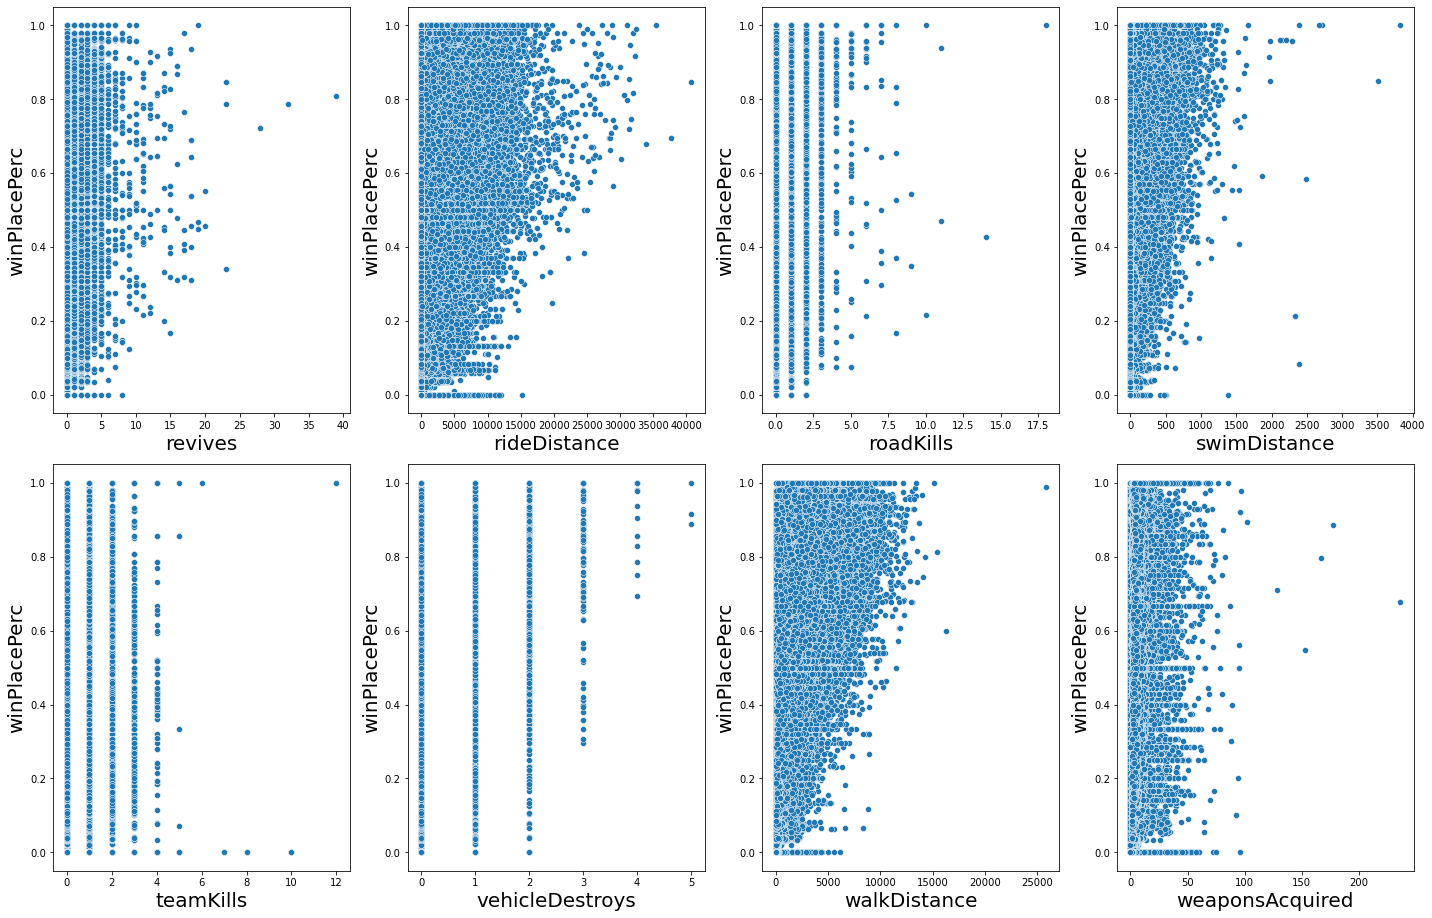

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data3:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data3[column],y=data.winPlacePerc)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('winPlacePerc',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Data Preprocessing

In [9]:
## checking the missing values in the data
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
## imputation of target variable which contained Nan value
## since it is normally distributed,mean is the best option
## Impuation using inbuild method fillna.
data['winPlacePerc']  = data['winPlacePerc'].fillna(data['winPlacePerc'].mean())

In [11]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

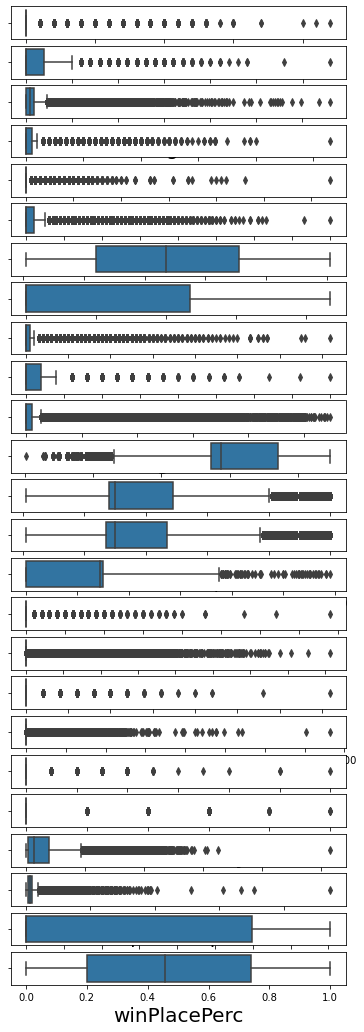

In [12]:
## checking the outliers if any
## outliers detection can be normally plotted using boxplot
box=data[['assists', 'boosts', 'damageDealt', 'DBNOs', 
          'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
          'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
          'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']]
plt.figure(figsize=(6,18), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :     
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('winPlacePerc',fontsize=20)
        
        
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='assists'>

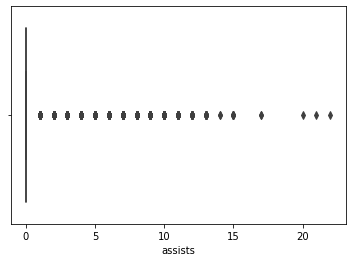

In [39]:
sns.boxplot(data.assists)

<AxesSubplot:xlabel='boosts'>

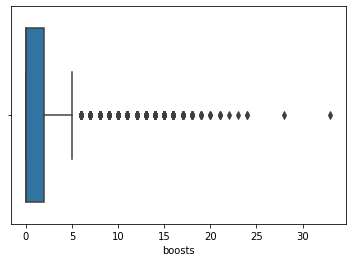

In [40]:
sns.boxplot(data.boosts)

<AxesSubplot:xlabel='damageDealt'>

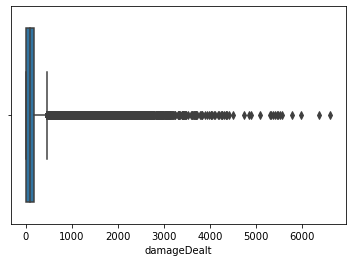

In [41]:
sns.boxplot(data.damageDealt)

<AxesSubplot:xlabel='DBNOs'>

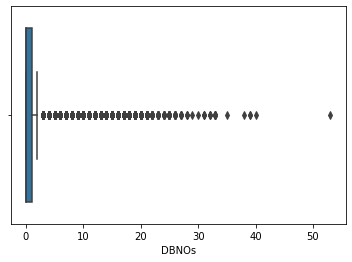

In [42]:
sns.boxplot(data.DBNOs)

<AxesSubplot:xlabel='headshotKills'>

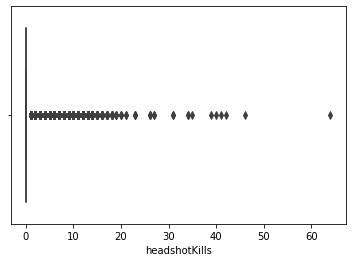

In [43]:
sns.boxplot(data.headshotKills)

<AxesSubplot:xlabel='heals'>

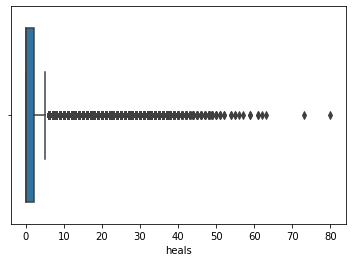

In [44]:
sns.boxplot(data.heals)

<AxesSubplot:xlabel='killPlace'>

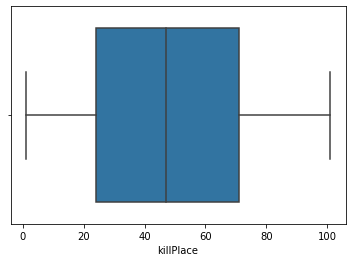

In [45]:
sns.boxplot(data.killPlace)

<AxesSubplot:xlabel='killPoints'>

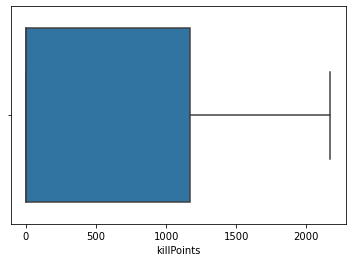

In [46]:
sns.boxplot(data.killPoints)

<AxesSubplot:xlabel='kills'>

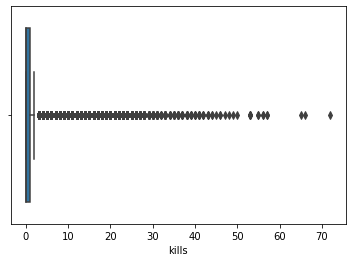

In [47]:
sns.boxplot(data.kills)

<AxesSubplot:xlabel='killStreaks'>

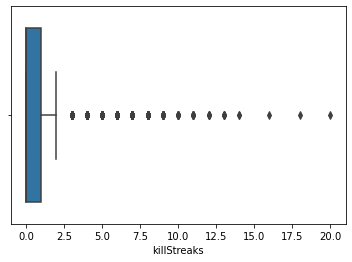

In [48]:
sns.boxplot(data.killStreaks)

<AxesSubplot:xlabel='longestKill'>

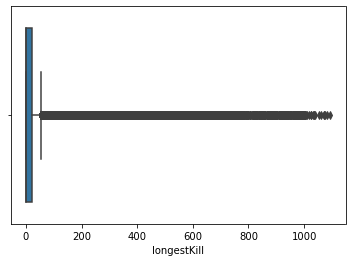

In [49]:
sns.boxplot(data.longestKill)

<AxesSubplot:xlabel='matchDuration'>

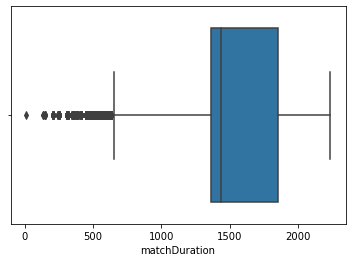

In [50]:
sns.boxplot(data.matchDuration)

<AxesSubplot:xlabel='maxPlace'>

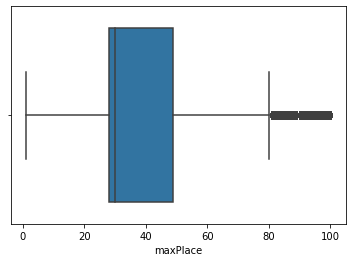

In [51]:
sns.boxplot(data.maxPlace)

<AxesSubplot:xlabel='numGroups'>

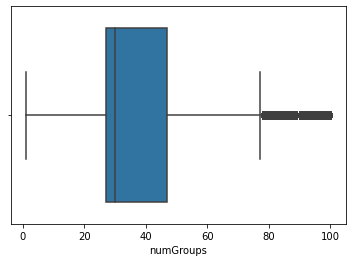

In [52]:
sns.boxplot(data.numGroups)

<AxesSubplot:xlabel='rankPoints'>

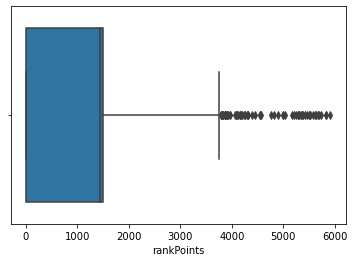

In [53]:
sns.boxplot(data.rankPoints)

<AxesSubplot:xlabel='revives'>

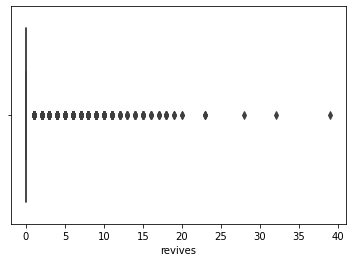

In [54]:
sns.boxplot(data.revives)

<AxesSubplot:xlabel='rideDistance'>

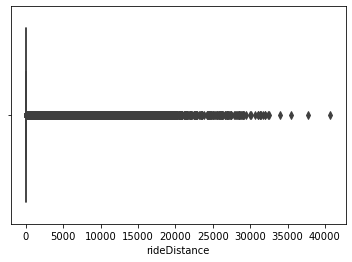

In [55]:
sns.boxplot(data.rideDistance)

<AxesSubplot:xlabel='roadKills'>

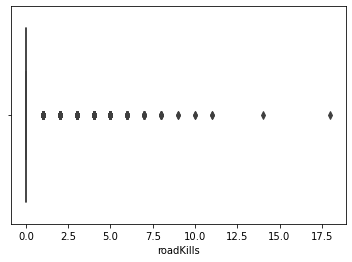

In [56]:
sns.boxplot(data.roadKills)

<AxesSubplot:xlabel='swimDistance'>

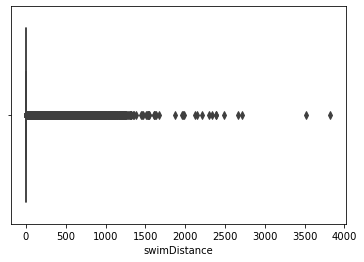

In [57]:
sns.boxplot(data.swimDistance)

<AxesSubplot:xlabel='teamKills'>

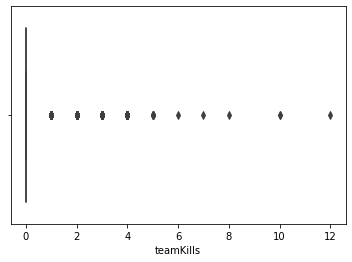

In [58]:
sns.boxplot(data.teamKills)

<AxesSubplot:xlabel='vehicleDestroys'>

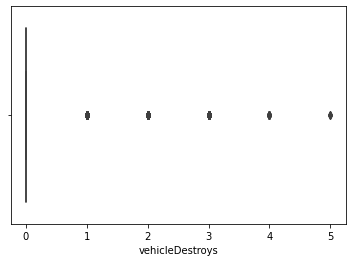

In [59]:
sns.boxplot(data.vehicleDestroys)

<AxesSubplot:xlabel='walkDistance'>

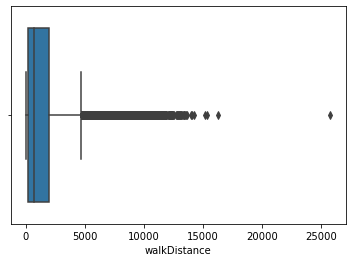

In [60]:
sns.boxplot(data.walkDistance)

<AxesSubplot:xlabel='weaponsAcquired'>

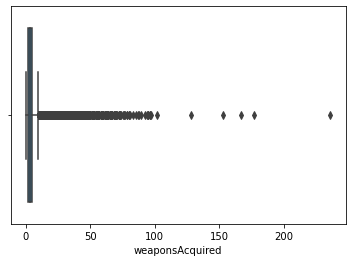

In [61]:
sns.boxplot(data.weaponsAcquired)

<AxesSubplot:xlabel='winPoints'>

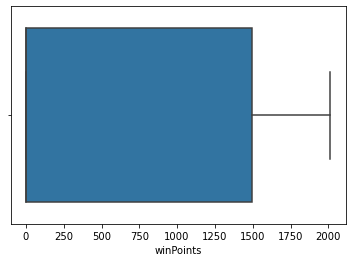

In [62]:
sns.boxplot(data.winPoints)

<AxesSubplot:xlabel='winPlacePerc'>

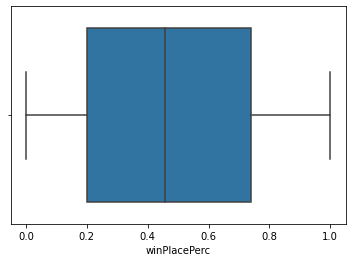

In [63]:
sns.boxplot(data.winPlacePerc)

Converting categorical variable into numerical
we have only one categorical variable in the dataset

In [13]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data.matchType=label.fit_transform(data.matchType)

In [14]:
data.matchType.value_counts()

15    1756186
3      996691
14     626526
13     536762
2      313591
12     181943
11      17174
0        6287
7        5489
5        2505
9        1682
4         718
10        516
1         371
8         326
6         199
Name: matchType, dtype: int64

Skweness and Kurtosis test i.e check for normality

In [11]:
## Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)

3.567607389061071 assists
1.9499579492937802 boosts
2.9589191437528792 damageDealt
3.2015355527094433 DBNOs
5.2182591339737066 headshotKills
3.4443438113852487 heals
0.026423864003897752 killPlace
0.5191168700713831 killPoints
3.3629057616290163 kills
1.2525726427191113 killStreaks
3.9449167367404385 longestKill
0.2760014821086867 matchDuration
1.354721322727572 maxPlace
1.3616518707285172 numGroups
-0.3669558204481812 rankPoints
4.290685894575175 revives
3.3464173853897954 rideDistance
36.93490837094205 roadKills
14.72309180585915 swimDistance
8.194188234586349 teamKills
12.723035853236764 vehicleDestroys
1.0927968403103834 walkDistance
2.5723058742815788 weaponsAcquired
0.40535810175970244 winPoints
0.09882960528872986 winPlacePerc


In [12]:
## Kurtosis is a measure of whether the data are heavy-tailed or light-tailed 
## relative to a normal distribution
for column in box:
    print(stats.kurtosis(box[column]),column)

21.230714635716264 assists
4.2994330627607935 boosts
20.112869849437764 damageDealt
22.830924373665184 DBNOs
106.213476253697 headshotKills
18.699254743003742 heals
-1.184335500267243 killPlace
-1.5614202152053736 killPoints
27.43873698679711 kills
2.115789060617235 killStreaks
24.29523906610949 longestKill
-1.2649015495909193 matchDuration
0.4867205883864232 maxPlace
0.5360715248596457 numGroups
-1.8086542868016193 rankPoints
55.9336701788956 revives
14.812210280217826 rideDistance
2967.780499759839 roadKills
442.66086493616075 swimDistance
91.11028195735568 teamKills
189.39323371622584 vehicleDestroys
0.9906719712873979 walkDistance
59.355414196406926 weaponsAcquired
-1.8254199763137413 winPoints
-1.245389982642547 winPlacePerc


checking how data is distributed for every column

In [16]:
data1=data[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals']]

#### plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data1[column])
       
    plotnumber+=1
plt.tight_layout()

In [18]:
data2=data[['killPoints', 'kills','killStreaks', 'longestKill', 'matchType']]

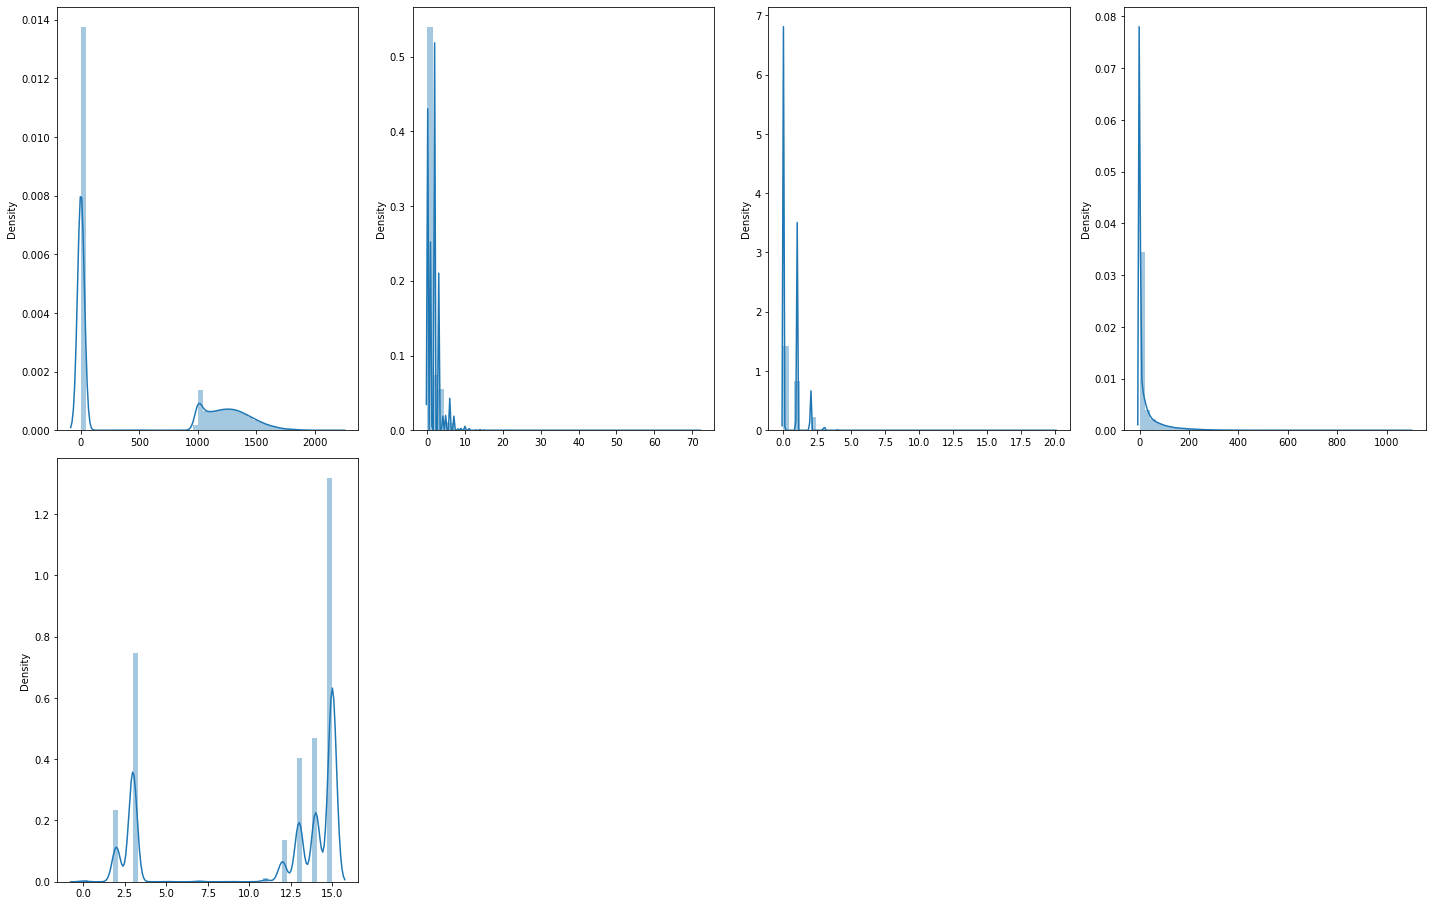

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data2[column])
       
    plotnumber+=1
plt.tight_layout()

In [20]:
data3=data[['numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance']]

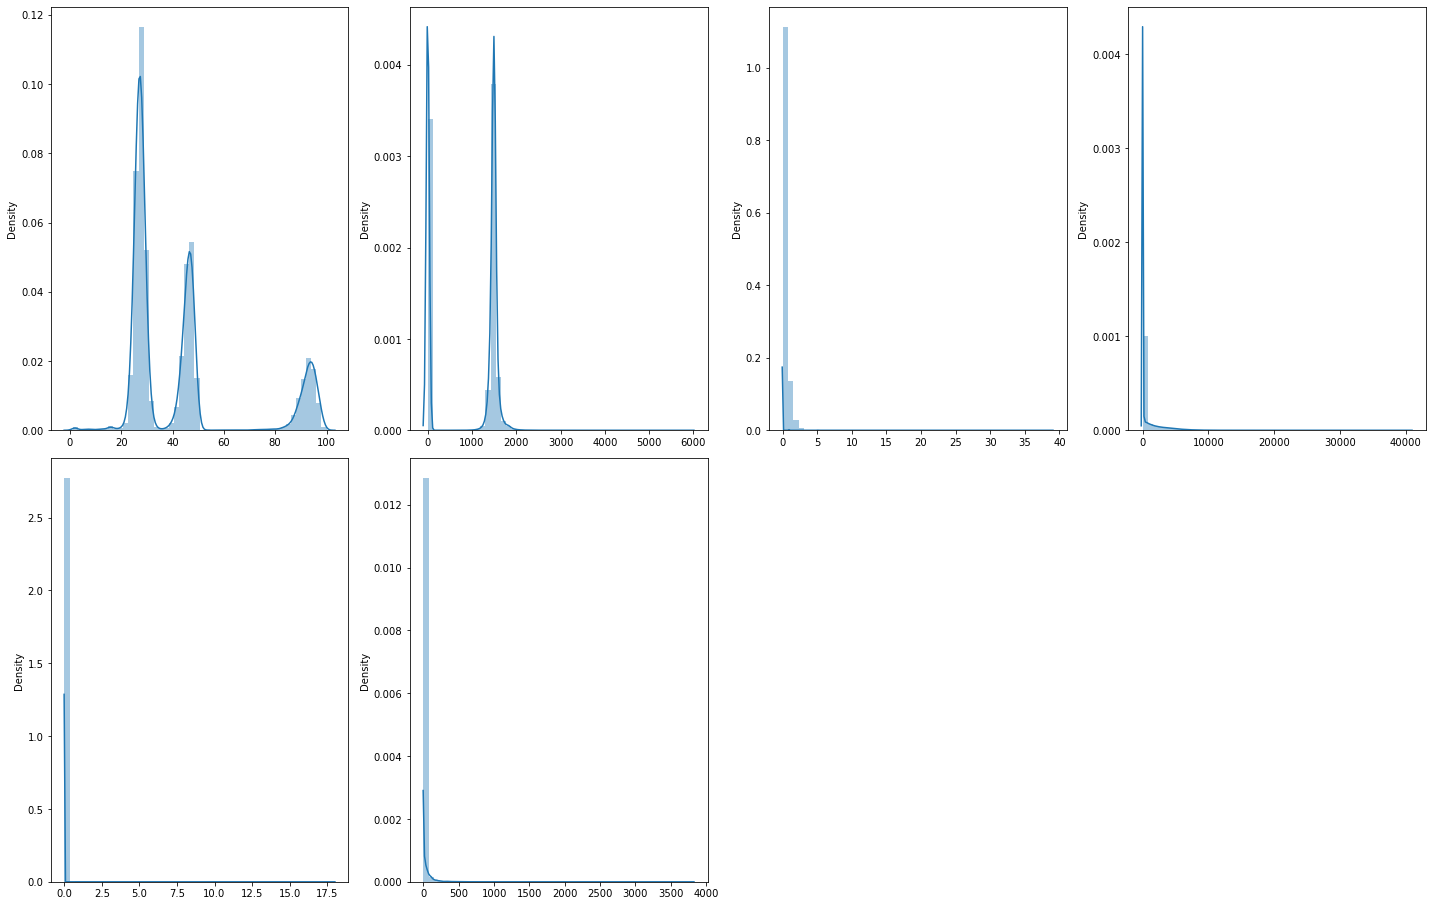

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data3:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data3[column])
       
    plotnumber+=1
plt.tight_layout()

In [22]:
data4=data[['teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']]

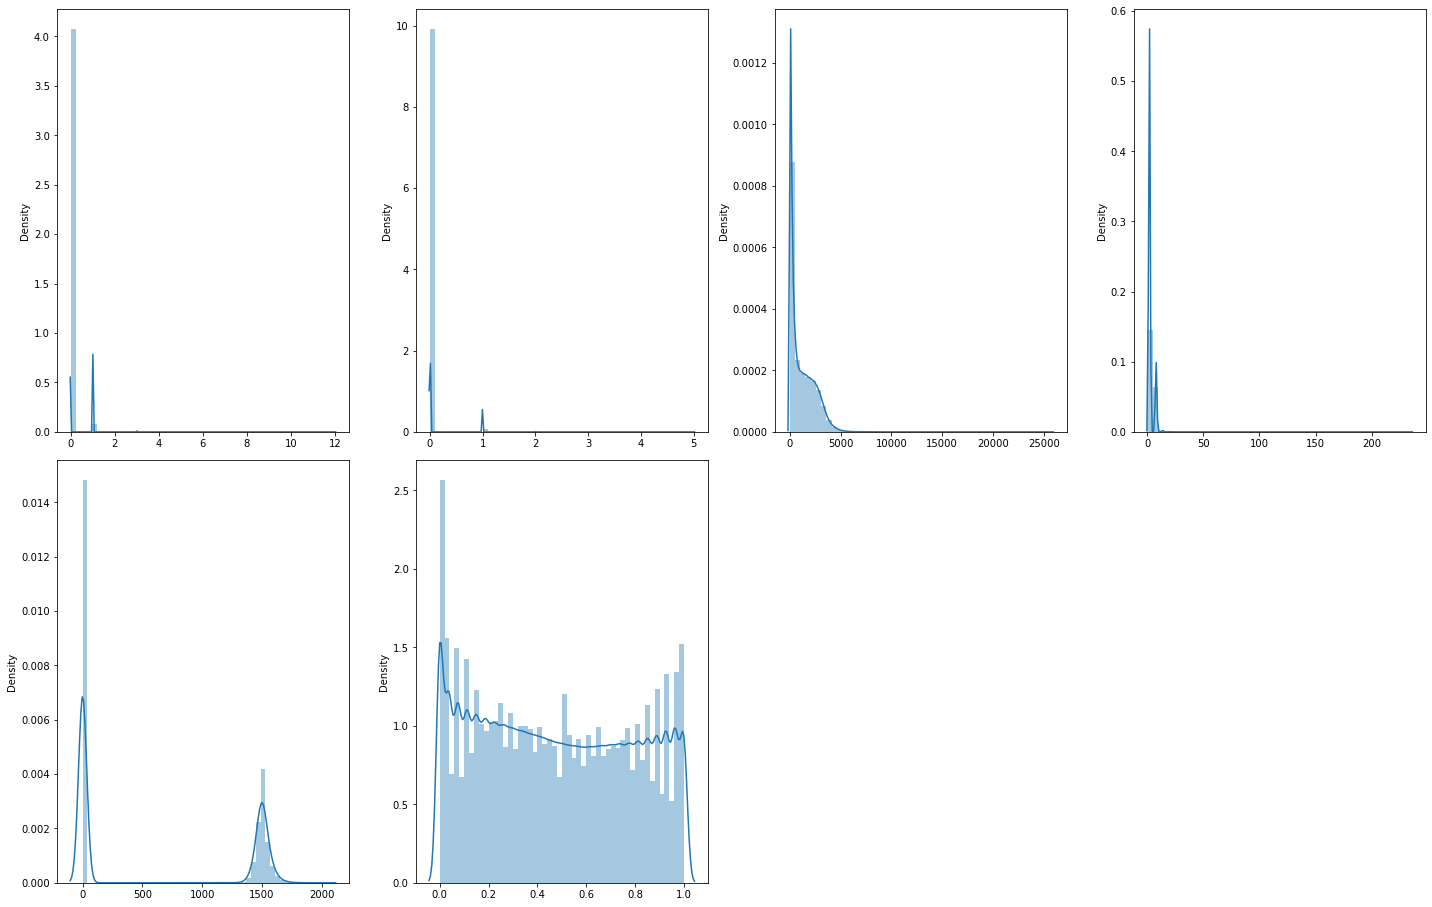

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data4:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data4[column])
       
    plotnumber+=1
plt.tight_layout()

In [58]:
data5=data[['_groupKills', '_groupRevives', '_groupWeapons', '_groupOwnKills', '_headshot_rate',
       '_totalDistance', '_playersJoined', '_walkDistancePerSec']]

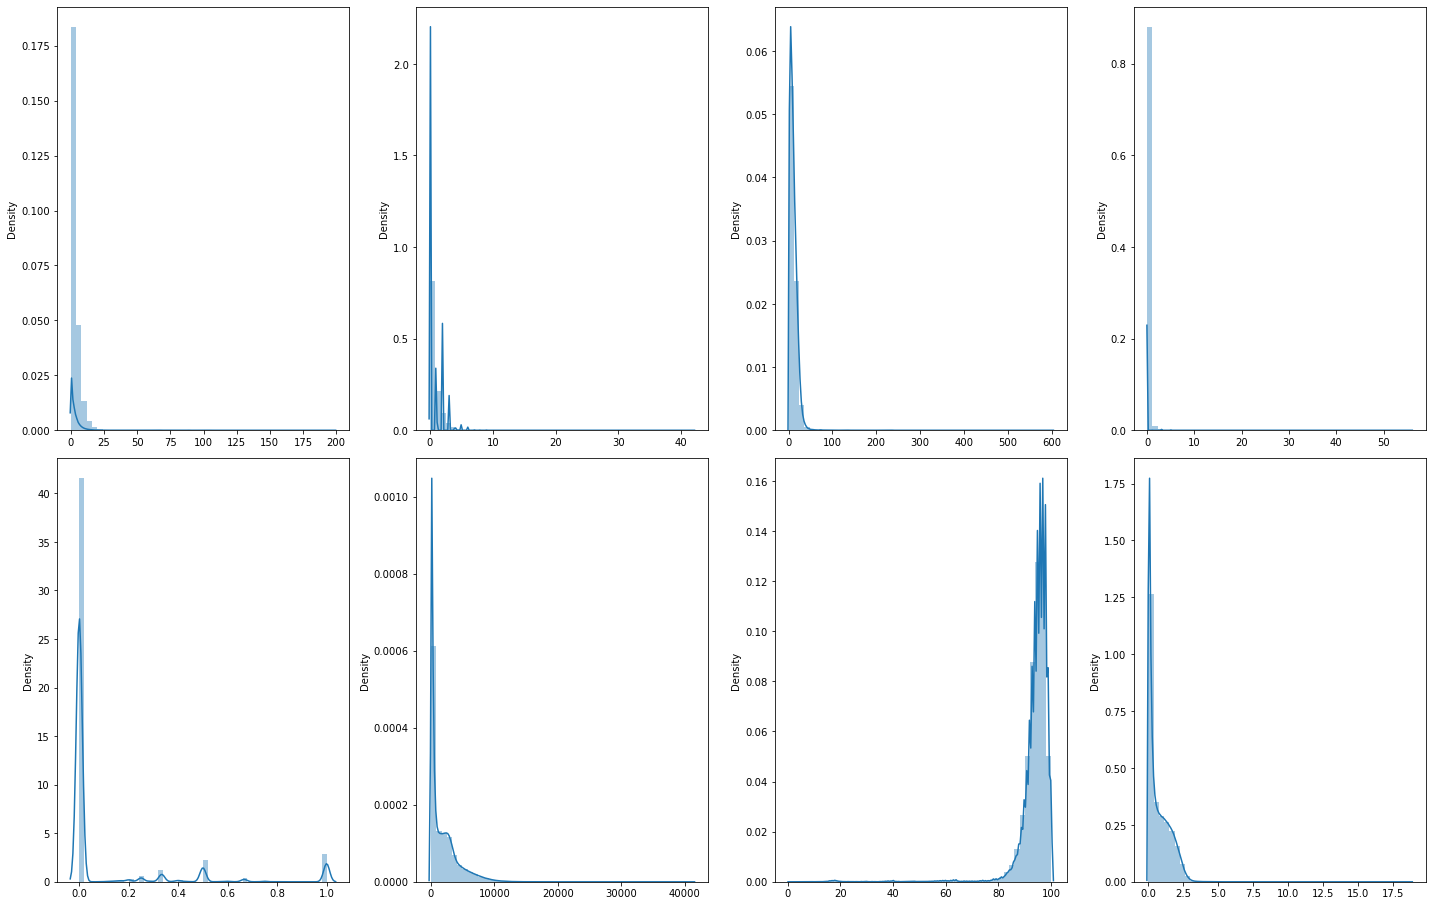

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data5:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data5[column])
       
    plotnumber+=1
plt.tight_layout()

In [30]:
data.columns


Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

Scaling

In [15]:
## standard scaling is performed when the data has normally distributed graph
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data[['rideDistance','walkDistance','swimDistance']]=scalar.fit_transform(data[['rideDistance','walkDistance','swimDistance']])

In [16]:
## minmax scaling is performed for the skewed graphs

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
data[['matchType','rankPoints','winPoints']]=scalar.fit_transform(data[['matchType','rankPoints','winPoints']])

In [15]:
## detect missing values in the given series object. 
## It return a boolean same-sized object indicating if the values are NA. 
## Missing values gets mapped to True and non-missing value gets mapped to False 
data.isna().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc       False
dtype: bool

# Feature Selection

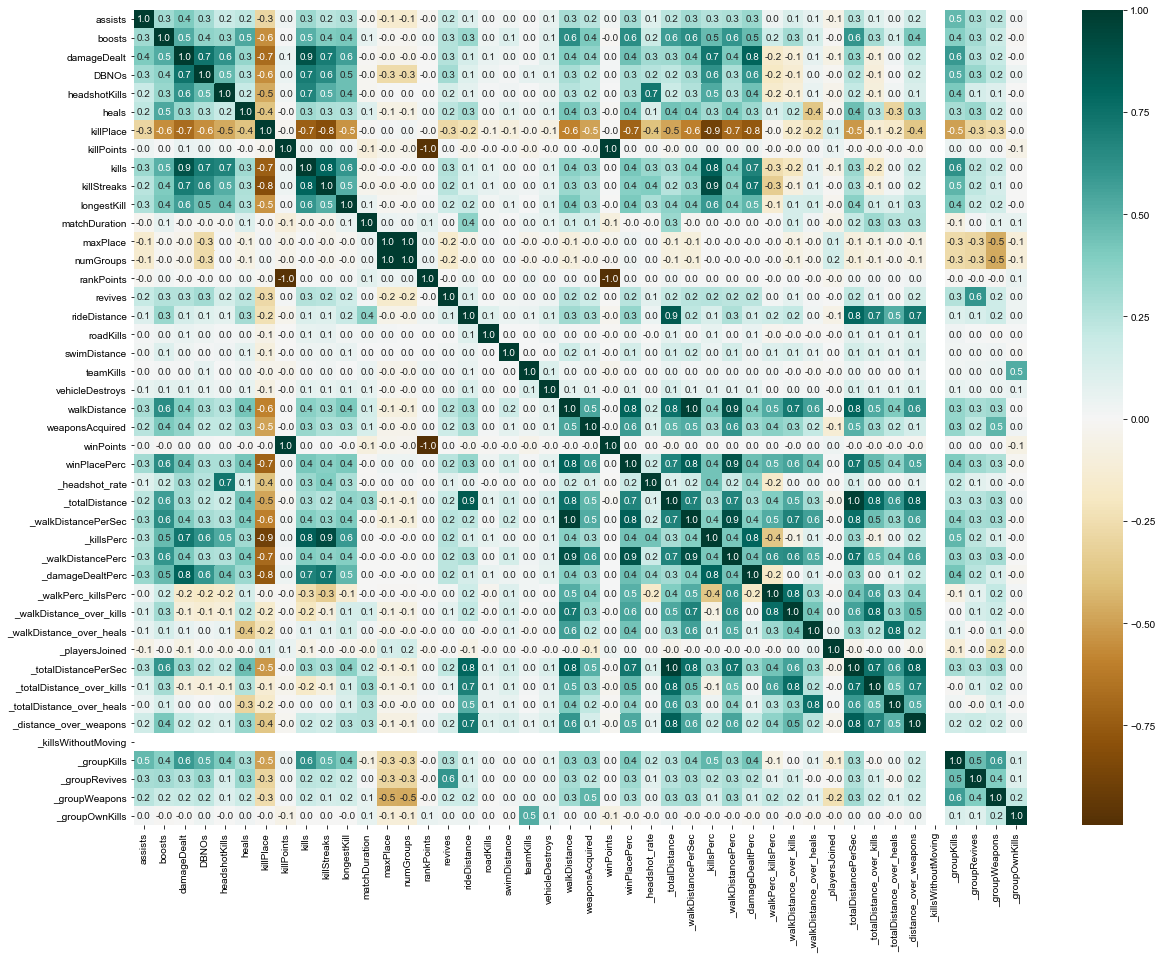

In [93]:
##cmap stands for colormap and it's a colormap instance or registered colormap name
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

Since there are many variables, we obtain the correlation between variables by drawing a variable heat diagram.

The heatmap can use color changes to reflect the data information in a two-dimensional matrix or 
table, and it can intuitively express the size of the data value in a defined color depth. The data 
is clustered as needed, and the clustered data is displayed on the heatmap, and the similarity and 
difference of the data are reflected by the color gradient and similarity.

In [16]:
## displays the correlated data 
corr_matrix = data.corr()
corr_matrix["winPlacePerc"].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810887
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
killStreaks        0.377566
rideDistance       0.342915
assists            0.299441
DBNOs              0.279970
headshotKills      0.277722
revives            0.240881
swimDistance       0.149607
vehicleDestroys    0.073436
numGroups          0.039621
maxPlace           0.037377
roadKills          0.034544
teamKills          0.015943
rankPoints         0.013523
killPoints         0.012908
winPoints          0.007061
matchDuration     -0.005171
matchType         -0.028514
killPlace         -0.719069
Name: winPlacePerc, dtype: float64

In [96]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', '_headshot_rate', '_totalDistance',
       '_walkDistancePerSec', '_killsPerc', '_walkDistancePerc',
       '_damageDealtPerc', '_walkPerc_killsPerc', '_walkDistance_over_kills',
       '_walkDistance_over_heals', '_playersJoined', '_totalDistancePerSec',
       '_totalDistance_over_kills', '_totalDistance_over_heals',
       '_distance_over_weapons', '_killsWithoutMoving', '_groupKills',
       '_groupRevives', '_groupWeapons', '_groupOwnKills'],
      dtype='object')

There seems to be relationship between theases however the relationship is not that strong.
So we will not drop further any features

In [17]:
## dropping the unwanted columns
## inplace=true will make the changes in original data
data.drop(['Id','groupId','matchId'],axis=1,inplace=True)

In [60]:
## dropping the unwanted columns
data.drop(['killPoints','matchDuration','maxPlace','numGroups','rankPoints','roadKills','teamKills','winPoints','matchType',
            '_groupOwnKills' ,'killPlace','vehicleDestroys','_killsWithoutMoving','_playersJoined'], axis=1, inplace=True)

In [19]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [96]:
data.drop(['_groupKills', '_groupRevives', '_groupWeapons', '_headshot_rate',
       '_totalDistance', '_walkDistancePerSec', '_totalDistancePerSec',
       '_walkDistance_over_kills', '_totalDistance_over_kills',
       '_walkDistance_over_heals', '_totalDistance_over_heals',
       '_distance_over_weapons', '_killsPerc', '_walkDistancePerc',
       '_damageDealtPerc', '_walkPerc_killsPerc'], axis=1,inplace=True)

In [17]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

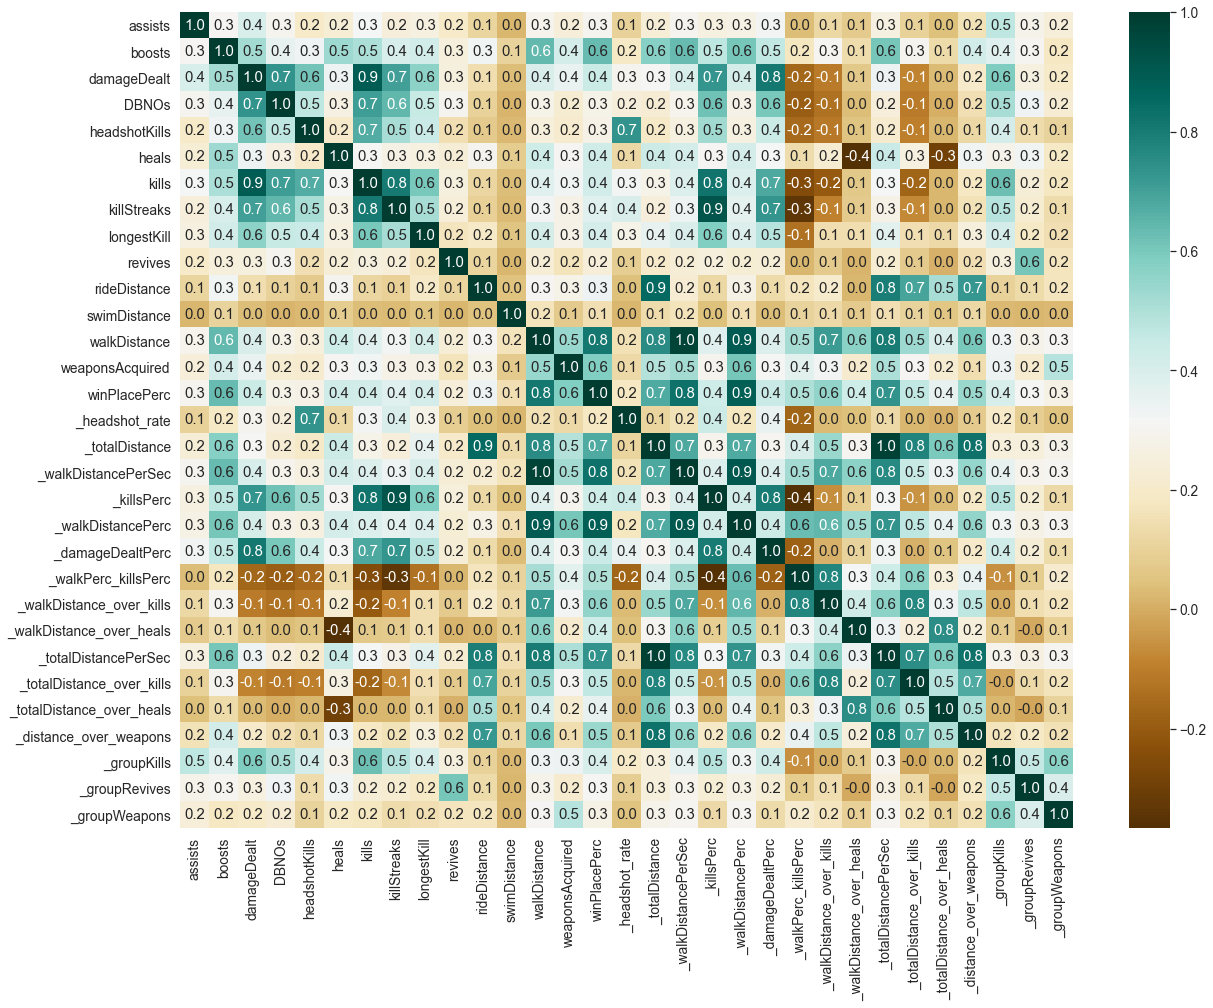

In [107]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [15]:
corr1_matrix = data.corr()
corr1_matrix["winPlacePerc"].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810887
boosts             0.634234
weaponsAcquired    0.583806
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
killStreaks        0.377566
rideDistance       0.342915
assists            0.299441
DBNOs              0.279970
headshotKills      0.277722
revives            0.240881
swimDistance       0.149607
vehicleDestroys    0.073436
numGroups          0.039621
maxPlace           0.037377
roadKills          0.034544
teamKills          0.015943
rankPoints         0.013523
killPoints         0.012908
winPoints          0.007061
matchDuration     -0.005171
killPlace         -0.719069
Name: winPlacePerc, dtype: float64

In [16]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'],
      dtype='object')

# Model Building

creating independent and dependent variables

In [18]:
##creating independent and dependent variables X & y
X=data.iloc[:,0:-1]
y=data.winPlacePerc

In [19]:
X.head()

assists  boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0        0       0         0.00      0              0      0         60   
1        0       0        91.47      0              0      0         57   
2        1       0        68.00      0              0      0         47   
3        0       0        32.90      0              0      0         75   
4        0       0       100.00      0              0      0         45   

   killPoints  kills  killStreaks  ...  rankPoints  revives  rideDistance  \
0        1241      0            0  ...    0.000000        0     -0.404524   
1           0      0            0  ...    0.251227        0     -0.404521   
2           0      0            0  ...    0.252411        0     -0.404524   
3           0      0            0  ...    0.238369        0     -0.404524   
4           0      1            1  ...    0.264084        0     -0.404524   

   roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0          0     -0.147836          0                0     -0.768416   
1          0      0.214105          0                0      0.236403   
2          0     -0.147836          0                0     -0.838547   
3          0     -0.147836          0                0     -0.803988   
4          0     -0.147836          0                0     -0.933224   

   weaponsAcquired  winPoints  
0                1   0.728266  
1                5   0.000000  
2                2   0.000000  
3                3   0.000000  
4                2   0.000000  

[5 rows x 25 columns]

In [20]:
y.head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

In [21]:
## Definiging training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        float64
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       float64
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        float64
 25  winPlacePerc     float64
dtypes: float64(9), int64(17)
memory usage: 882

In [25]:
data.winPlacePerc.value_counts()

0.0000    220505
1.0000    127573
0.5000     55065
0.3333     42508
0.6667     38112
           ...  
0.1207         1
0.2742         1
0.1857         1
0.5645         1
0.5167         1
Name: winPlacePerc, Length: 3001, dtype: int64

In [26]:
data.walkDistance.value_counts()

-0.975261    99603
-0.124392      955
-0.047501      945
-0.090594      939
-0.099889      934
             ...  
 5.853655        1
 6.391045        1
-0.974623        1
-0.974832        1
 4.541442        1
Name: walkDistance, Length: 38599, dtype: int64

In [27]:
data.swimDistance.value_counts()

-0.147836    4157694
 3.209299        122
 3.176515        104
 3.222413        104
 3.183072         99
              ...   
-0.131539          1
-0.132106          1
-0.130870          1
-0.146856          1
-0.142846          1
Name: swimDistance, Length: 28345, dtype: int64

In [28]:
data.rideDistance.value_counts()

-0.404524    3309429
 0.269554        334
 0.368330        332
 0.292913        331
 0.475114        329
              ...   
-0.377721          1
-0.392257          1
-0.401081          1
-0.404427          1
-0.400320          1
Name: rideDistance, Length: 33562, dtype: int64

In [29]:
data.longestKill.value_counts()

0.0000      2538735
102.6000        457
101.1000        451
10.5000         449
11.4800         447
             ...   
0.6573            1
0.4234            1
0.2470            1
980.2000          1
0.5639            1
Name: longestKill, Length: 28284, dtype: int64

In [30]:
data.damageDealt.value_counts()

0.0000       1238102
100.0000      262781
200.0000       62398
300.0000       13767
75.0000        12825
              ...   
8.0700             1
4.3040             1
2950.0000          1
0.0016             1
0.0253             1
Name: damageDealt, Length: 29916, dtype: int64

In [32]:
data.rankPoints.value_counts()

0.000000    1701810
0.253933     299741
0.000169      89509
0.250550      48857
0.252918      42612
             ...   
0.427677          1
0.433598          1
0.457452          1
0.017933          1
0.984774          1
Name: rankPoints, Length: 2262, dtype: int64

# LINEAR REGRESSION

In [22]:
##regression tasks are normally done using linear regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression() ## object creation
LR.fit(X_train,y_train)

LinearRegression()

In [23]:
y_hat=LR.predict(X_test)

In [24]:
y_hat

array([0.29817027, 0.76632587, 0.77405261, ..., 0.18433732, 0.65199938,
       0.65530997])

# Model Evaluation

In [25]:
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score,classification_report,accuracy_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.8318235087155621

In [26]:
test_score=r2_score(y_test,y_hat)
test_score

0.8317009631977962

In [27]:
X_train.shape,X_test.shape

((3335224, 25), (1111742, 25))

In [28]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.83)*(3335224-1)/(3335224-25-1)
train_adjusted_r2

0.8299987257128362

In [29]:
test_adjusted_r2= 1-(1-0.83)*(1111742-1)/(1111742-25-1)
test_adjusted_r2

0.829996177081197

# DECISIONTREE

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [32]:
dtree.score(X_train, y_train)

0.9788000068672581

In [33]:
dtree.score(X_test, y_test)

0.8788850158768797

In [34]:
p_test = dtree.predict(X_test)


In [35]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [36]:
mae(p_test, y_test)

0.07366935178600734

In [37]:
def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, y_train)))
    print("validation r^2 " + str(mm.score(X_test, y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 0.9788000068672581
validation r^2 0.8788850158768797
mean absolute error(Train): 0.024037926606206593
mean absolute error(Validation): 0.07366935178600734


In [38]:
p_test = dtree.predict(X_test)

In [39]:
p_test

array([0.3558    , 0.3333    , 0.9293    , ..., 0.18262151, 0.75186508,
       0.7308    ])

# xgboost

In [40]:
import xgboost

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335224 entries, 321049 to 1692743
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        float64
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       float64
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        float64
dtypes: float64(8), int64(17)
memory usage: 661.6 MB


In [94]:
r2_score(y_test,y_hat)

0.8317009631977962

In [95]:
train_adjusted_r2 = 1-(1-0.83)*(3335224-1)/(3335224-25-1)
train_adjusted_r2

0.8299987257128362

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335224 entries, 321049 to 1692743
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        float64
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       float64
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        float64
dtypes: float64(8), int64(17)
memory usage: 661.6 MB


In [42]:
X_train.damageDealt=X_train.damageDealt.astype('int64')
X_train.longestKill=X_train.longestKill.astype('int64')
X_train.rideDistance=X_train.rideDistance.astype('int64')
X_train.swimDistance=X_train.swimDistance.astype('int64')
X_train.walkDistance=X_train.walkDistance.astype('int64')

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335224 entries, 321049 to 1692743
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      int64  
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      int64  
 11  matchDuration    int64  
 12  matchType        float64
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       float64
 16  revives          int64  
 17  rideDistance     int64  
 18  roadKills        int64  
 19  swimDistance     int64  
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     int64  
 23  weaponsAcquired  int64  
 24  winPoints        float64
dtypes: float64(3), int64(22)
memory usage: 661.6 MB


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111742 entries, 4289863 to 3390427
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  float64
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  float64
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  float64
 13  maxPlace         1111742 non-null  int64  
 14  numGroups        1111742 non-null  int64  
 15  rankPoints       1111742 non-null  float64
 16  revives     

In [45]:
X_test.damageDealt=X_test.damageDealt.astype('int64')
X_test.longestKill=X_test.longestKill.astype('int64')
X_test.rideDistance=X_test.rideDistance.astype('int64')
X_test.swimDistance=X_test.swimDistance.astype('int64')
X_test.walkDistance=X_test.walkDistance.astype('int64')

In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111742 entries, 4289863 to 3390427
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  int64  
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  int64  
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  float64
 13  maxPlace         1111742 non-null  int64  
 14  numGroups        1111742 non-null  int64  
 15  rankPoints       1111742 non-null  float64
 16  revives     

In [47]:
r2_score(y_test,y_hat)

0.8317009631977962